<a href="https://colab.research.google.com/github/vasukiup/ProcessSequencePrediction/blob/master/regression_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.

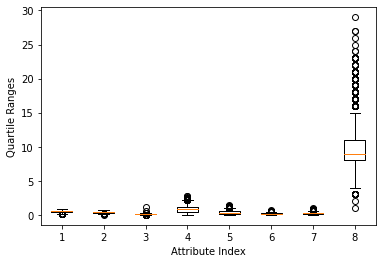

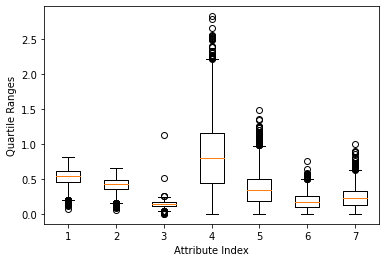

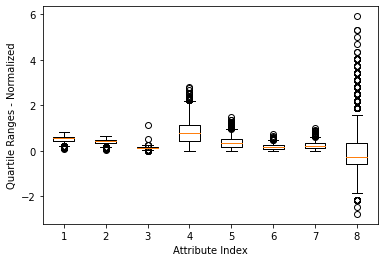

In [1]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

#read abalone data
abalone= pd.read_csv(target_url, header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
print(abalone.head())
print(abalone.tail())

# Print summary of data frame
summary = abalone.describe()
print (summary)

#box plot the real-valued attributes
#convert to array for plot routine

array = abalone.iloc[:, 1:9].values
boxplot(array)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges"))
show()

# the last column (rings) is out of scale with the rest
# - remove and replot
array = abalone.iloc[:, 1:8].values
boxplot(array)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges"))
show()

#removing is okay but renormalizing the variables generalizes better
#renormalize columns to zero mean and unit standard deviation
#this is a common normalisation and desirable for other operations
#(like k-means clustering or k-nearest neighbors)

abaloneNormalized = abalone.iloc[:,1:9]

for i in range(8):
  mean = summary.iloc[1, i]
  sd = summary.iloc[2, i]

abaloneNormalized.iloc[:,i:(i + 1)] = (abaloneNormalized.iloc[:,i:(i + 1)] - mean) / sd

array3 = abaloneNormalized.values
boxplot(array3)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges - Normalized"))
show()